In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
from sklearn.preprocessing import MinMaxScaler

In [2]:
houses = pd.read_csv('/Users/user/Desktop/Deep Learning Exercises/house-prices.csv')

In [3]:
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   area      20 non-null     int64  
 1   bedrooms  20 non-null     int64  
 2   price     20 non-null     float64
dtypes: float64(1), int64(2)
memory usage: 608.0 bytes


In [103]:
sx = MinMaxScaler()
sy = MinMaxScaler()

In [104]:
scaled_x = sx.fit_transform(houses.drop('price',axis=1))
scaled_y = sy.fit_transform(houses[['price']])

In [105]:
scaled_y

array([[0.05237037],
       [0.65185185],
       [0.22222222],
       [0.31851852],
       [0.14074074],
       [0.04444444],
       [0.76296296],
       [0.91111111],
       [0.13333333],
       [1.        ],
       [0.37037037],
       [0.8       ],
       [0.04444444],
       [0.05925926],
       [0.51111111],
       [0.07407407],
       [0.11851852],
       [0.20740741],
       [0.51851852],
       [0.        ]])

In [106]:
def batch_gradient_descent(x, y_true, epoch,learning_rate=0.01):
    number_of_features = x.shape[1]
    weight = np.ones(shape=(number_of_features))
    bias = 0
    total_samples = x.shape[0]
    cost_list = []
    epoch_list = []
    for i in range(epoch):
        y_predicted = np.dot(weight, scaled_x.T) + bias
        
        weight_gradient = -(2/total_samples)*(x.T.dot(y_true-y_predicted)) 
        bias_gradient = -(2/total_samples)*np.sum(y_true-y_predicted)
        
        weight = weight -  learning_rate * weight_gradient
        bias = bias - learning_rate * bias_gradient
        
        cost = np.mean(np.square(y_true-y_predicted))
        
        if i%10 == 0:
            cost_list.append(cost)
            epoch_list.append(i)
        figure = plt.plot(epoch_list,cost_list)
        plt.xlabel('Epochs')
        plt.ylabel('Cost')
    return figure, cost,bias,weight

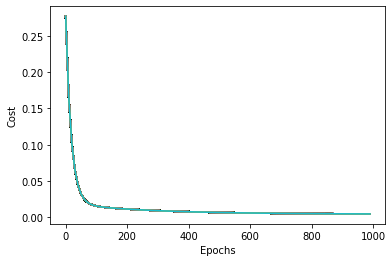

In [107]:
figure,cost,bias,weight = batch_gradient_descent(scaled_x,scaled_y.reshape(scaled_y.shape[0],),1000)
figure

In [96]:
bias

-0.17792104056392882

In [108]:
def predict(area,bedroom,weight,bias):
    scaled_x = sx.transform([[area,bedroom]])[0]
    
    scaled_price = weight[0] * scaled_x[0] + weight[1] * scaled_x[1] + bias
    return sy.inverse_transform([[scaled_price]])[0][0]

In [109]:
predict(1000,2,weight=weight,bias=bias)

C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


34.60197457980031

In [110]:
from random import randint

In [113]:
def stochastic_gradient_descent(x, y_true, epoch,learning_rate=0.01):
    number_of_features = x.shape[1]
    weight = np.ones(shape=(number_of_features))
    bias = 0
    total_samples = x.shape[0]
    cost_list = []
    epoch_list = []
    for i in range(epoch):
        random_index = randint(0,total_samples-1)
        sample_x = x[random_index]
        sample_y = y_true[random_index]
        y_predicted = np.dot(weight, sample_x.T) + bias
        
        weight_gradient = -(2/total_samples)*(sample_x.T.dot(sample_y-y_predicted)) 
        bias_gradient = -(2/total_samples)*np.sum(sample_y-y_predicted)
        
        weight = weight -  learning_rate * weight_gradient
        bias = bias - learning_rate * bias_gradient
        
        cost = np.mean(np.square(sample_y-y_predicted))
        
        if i%100 == 0:
            cost_list.append(cost)
            epoch_list.append(i)
        figure = plt.plot(epoch_list,cost_list)
        plt.xlabel('Epochs')
        plt.ylabel('Cost')
    return figure, cost,bias,weight

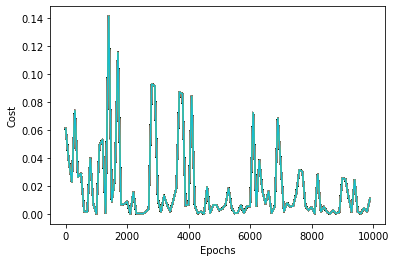

In [114]:
figure,cost,bias,weight = stochastic_gradient_descent(scaled_x,scaled_y.reshape(scaled_y.shape[0],),10000)
figure